In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

In [3]:
list = [[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]]
arr = np.array(list)
print(arr.shape)

(2, 2, 3)


In [7]:
# tensorflow 1.x

x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

W = tf.Variable(tf.random.normal([2,10]))
b = tf.Variable(tf.random.normal([10]))
layer = tf.sigmoid(tf.matmul(X,W) + b)

W2 = tf.Variable(tf.random.normal([10,6]))
b2 = tf.Variable(tf.random.normal([6]))
layer2 = tf.sigmoid(tf.matmul(layer,W2) + b2)

W3 = tf.Variable(tf.random.normal([6,1]))
b3 = tf.Variable(tf.random.normal([1]))

logit = tf.matmul(layer2,W3) + b3
H = tf.sigmoid(logit)

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,labels=T))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
    _, loss_val = sess.run([train, loss], feed_dict={X:x_data, T:t_data})
    
    if step%3000 == 0:
        print('loss : {}'.format(loss_val))

loss : 1.3059170246124268
loss : 0.6661826372146606
loss : 0.6069933176040649
loss : 0.47494742274284363
loss : 0.2866765260696411
loss : 0.15425914525985718
loss : 0.09018906205892563
loss : 0.05881958082318306
loss : 0.04175754263997078
loss : 0.03151746094226837


In [9]:
accuracy = tf.cast(H >= 0.5, dtype=tf.float32)
result = sess.run(accuracy, feed_dict={X:x_data})

print(classification_report(t_data.ravel(), result.ravel()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [11]:
# tensorflow 2.x

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

model = Sequential()

model.add(Flatten(input_shape=(2,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer=SGD(learning_rate=1e-2), loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(x_data, t_data, epochs=10000, verbose=0)


In [12]:
predict_val = model.predict(x_data)
result = tf.cast(predict_val >= 0.5, dtype=tf.float32).numpy().ravel()


print(classification_report(t_data.ravel(), result))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



dict_keys(['loss', 'accuracy'])


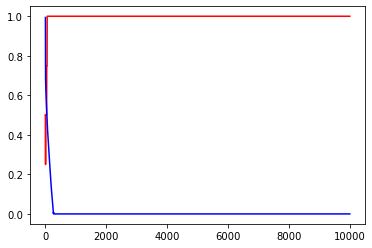

In [13]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['loss'], color='b')
plt.show()